In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("titanic_csv.csv", index_col = 0)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [4]:
data = data.interpolate()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [6]:
X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = data['survived']

In [7]:
X= pd.get_dummies(X)
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,29.0000,0,0,211.3375,1,0,0,0,1
2,1,0.9167,1,2,151.5500,0,1,0,0,1
3,1,2.0000,1,2,151.5500,1,0,0,0,1
4,1,30.0000,1,2,151.5500,0,1,0,0,1
5,1,25.0000,1,2,151.5500,1,0,0,0,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
#du doan
y_predict = clf.predict(X_test)

In [73]:
#do chinh xac
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_predict, y_test))

Accuracy:  0.7531806615776081


In [74]:
#R^2 score
print("Training score: ", clf.score(X_train, y_train))
print("Testting score: ", clf.score(X_test, y_test))

Training score:  0.99235807860262
Testting score:  0.7531806615776081


In [42]:
#tim cac thuoc tinh quan trong
feature_imp = pd.Series(clf.feature_importances_, index = np.array(X.columns))
feature_imp

pclass        0.123121
age           0.090902
sibsp         0.036848
parch         0.031261
fare          0.103492
sex_female    0.332359
sex_male      0.242748
embarked_C    0.024520
embarked_Q    0.004038
embarked_S    0.010712
dtype: float64

In [43]:
feature_imp[feature_imp>0.05].sum()

0.8926224886701024

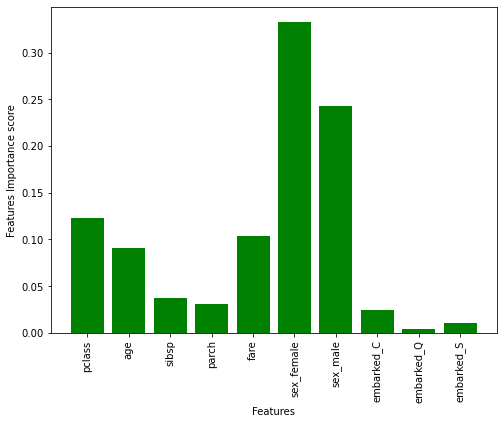

In [44]:
plt.figure(figsize=(8,6))
plt.bar(feature_imp.index, feature_imp, color = "g")
plt.xlabel("Features")
plt.ylabel("Features Importance score")
plt.xticks(feature_imp.index, rotation = 'vertical')
plt.show()

In [45]:
X_now = X[['age', 'fare', 'sex_female', 'sex_male', 'pclass']]
y_now = data['survived']

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_now, y_now, test_size = 0.3)

In [75]:
clf = RandomForestClassifier(n_estimators= 100)
clf.fit(X_train1, y_train1)

RandomForestClassifier()

In [76]:
y_pred = clf.predict(X_test1)

In [77]:
print("Accuracy: ", accuracy_score(y_pred, y_test1))

Accuracy:  0.7582697201017812


In [78]:
#-> model co giam do chinh xac 1 chut

In [79]:
#R^2 score
print("Training score: ", clf.score(X_train1, y_train1))
print("Testting score: ", clf.score(X_test1, y_test1))

Training score:  0.9879912663755459
Testting score:  0.7582697201017812


In [54]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test1, y_pred)

array([[206,  32],
       [ 51, 104]], dtype=int64)

In [60]:
#danh gia model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [61]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       238
           1       0.76      0.67      0.71       155

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393



In [65]:
y_prob = clf.predict_proba(X_test1)
y_probs = y_prob[:,1]

In [66]:
roc_auc_score(y_test1,y_probs)

0.823963133640553

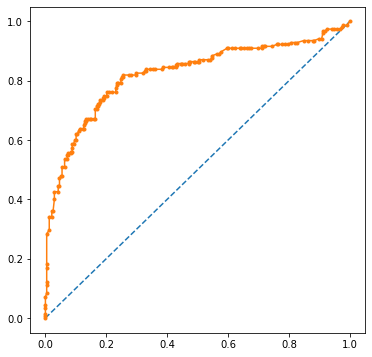

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
fpr, tpr, thresholds = roc_curve(y_test1, y_probs)
plt.plot([0, 1], [0,1], linestyle = "--")
plt.plot(fpr, tpr, marker='.')
plt.show()

**Nhan xet**:
* mo hinh train co R^2(0.99) cao hon so voi test(0.75) o ca full feature va bo bot feature
* ROC AUC score ~0.84


In [80]:
clf.predict([[35, 40, 0 ,1, 3],[18, 230,1,0,2]])

array([0, 1], dtype=int64)